#  Experimentacion usando CNN


### Primero pre procesamos la data de los textos . Se procedera a realizar 

#### Cargar data

In [55]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.head())

                                             message label
0  I saw this movie in NEW York city. I was waiti...   neg
1  This is a German film from 1974 that is someth...   neg
2  I attempted watching this movie twice and even...   neg
3  On his birthday a small boys tells his mother ...   neg
4  The person who wrote the review "enough with t...   pos


#### Pre procesar data de texto por medio de limpieza y lemmatizacion

In [56]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Descargar recursos necesarios de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

def preprocess_text(text):
    # Tokenizar el texto
    tokens = nltk.word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    # Lematizar y eliminar stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    
    return ' '.join(tokens)




train['clean_message'] = train['message'].apply(preprocess_text)
test['clean_message'] = test['message'].apply(preprocess_text)
# Save the cleaned text to a new CSV file
train.to_csv('lemmatized_train.csv', index=False)
test.to_csv('lemmatized_test.csv' , index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Encoders, decodores de labels y conversores de texto en secuencias 

In [57]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

def encode_labels(set_label):
    numeric_labels = []
    for label in set_label:
        if(label=='neg'):
            numeric_labels.append(0)
        else:
            numeric_labels.append(1)
    return np.array(numeric_labels)       
def interpret_predictions(new_reviews, tokenizer, model, maxlen):
    new_data = get_text_sequence_for_prediction(new_reviews, tokenizer, maxlen)
    predictions = model.predict(new_data)
    results = []
    for i, review in enumerate(new_reviews):
        sentiment = "pos" if predictions[i] > 0.5 else "neg"
        results.append (sentiment)
    return results



def get_text_sequence(texts):
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    word_index = tokenizer.word_index
    maxlen = max(len(seq) for seq in sequences)

    data = pad_sequences(sequences , maxlen=maxlen )
    return data , word_index , tokenizer , maxlen
def get_text_sequence_for_prediction(texts, tokenizer, maxlen):
    sequences = tokenizer.texts_to_sequences(texts)
    data = pad_sequences(sequences, maxlen=maxlen)
    return data



#### Dividir data para entrenamiento


In [58]:
from sklearn.model_selection import train_test_split


train = pd.read_csv('lemmatized_train.csv')



data , word_index , tokenizer , maxlen = get_text_sequence(train['clean_message'])

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data, train['label'], test_size=0.2, random_state=42)


y_train = encode_labels(y_train)
y_test = encode_labels(y_test)




In [59]:
print(X_train) 
print(y_train)
print(len(word_index))


[[   0    0    0 ...    1    1 4496]
 [   0    0    0 ...   11   15 3341]
 [   0    0    0 ...    9   18  173]
 ...
 [   0    0    0 ... 2644  455  189]
 [   0    0    0 ... 2493  222   34]
 [   0    0    0 ...   49  385 1196]]
[0 0 0 ... 1 1 0]
63901


#### Creacion del modelo CNN para predecir texto

Epoch 1/10


d:\Semestre_2024-1_CS\ML\Projetcs\Project1\penv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 85ms/step - accuracy: 0.6196 - loss: 0.6038 - val_accuracy: 0.8512 - val_loss: 0.3581
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8333 - loss: 0.3594 - val_accuracy: 0.8602 - val_loss: 0.3316
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.8791 - loss: 0.2632 - val_accuracy: 0.8596 - val_loss: 0.3449
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.9035 - loss: 0.1935 - val_accuracy: 0.8522 - val_loss: 0.3817
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.9205 - loss: 0.1457 - val_accuracy: 0.8572 - val_loss: 0.4634
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.9259 - loss: 0.1145 - val_accuracy: 0.8626 - val_loss: 0.5348
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.9308 - loss: 0.1034 - val_accuracy: 0.8588 - val_loss: 0.6511
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.9346 - loss: 0.0965 - val_accurac

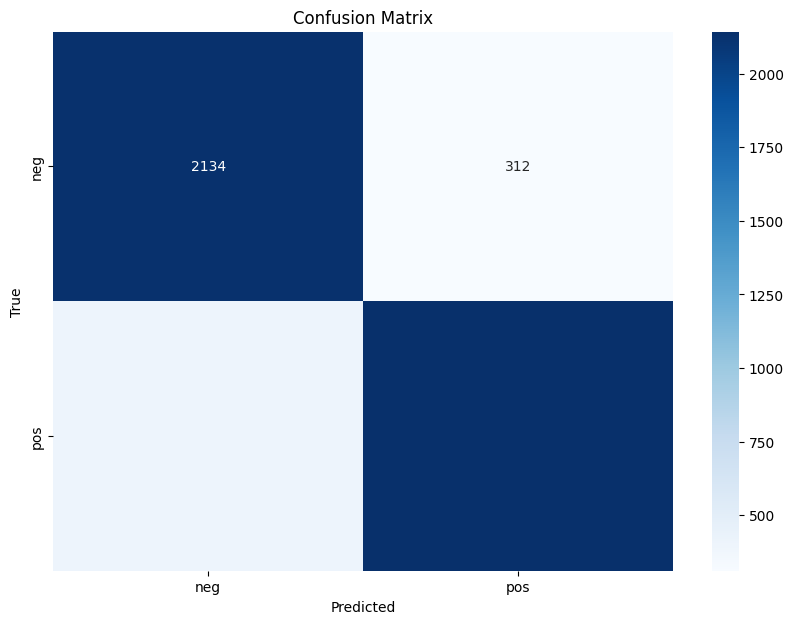

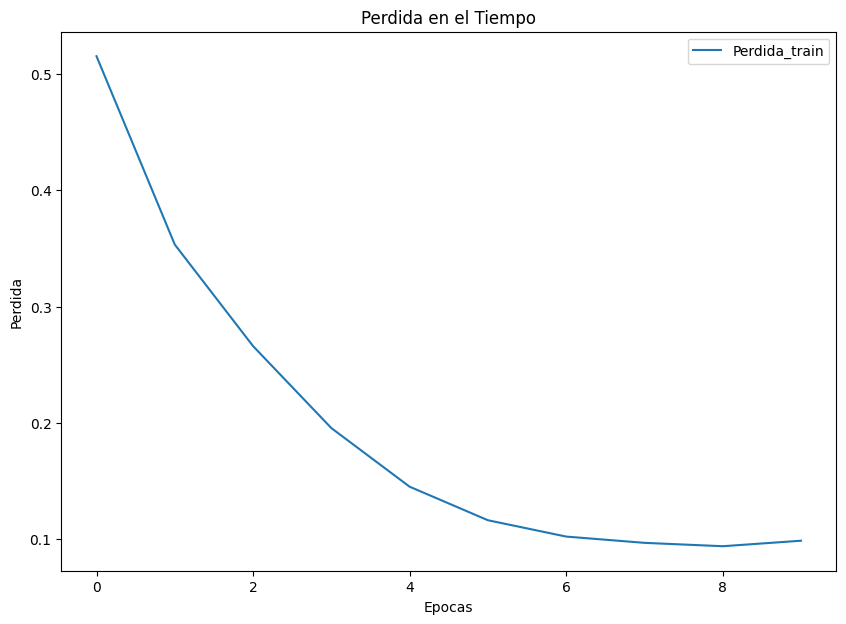

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


#Creacion del modelo
model = Sequential() #instanciar la clase sequential
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=maxlen)) #creacion del Embedding de 128 canales que entrenara en batches de textos que tienen por lo maximo maaxlen palabras
model.add(Conv1D(filters=128, kernel_size=5, activation='relu')) # Se aplica una convolucion de una dimension y activacion relu
model.add(GlobalMaxPooling1D())#
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))






model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


# Predicciones para el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Reporte de clasificación
report = classification_report(y_test, y_pred, target_names=['neg', 'pos'])
print(report)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['neg', 'pos'], yticklabels=['neg', 'pos'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Gráfica de la pérdida durante el entrenamiento
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Perdida_train')
plt.xlabel('Epocas')
plt.ylabel('Perdida')
plt.title('Perdida en el Tiempo')
plt.legend()
plt.show()

### Generar predicciones para kaggle


In [54]:
test =  pd.read_csv('lemmatized_test.csv')
predictions = interpret_predictions(test['clean_message'], tokenizer, model, maxlen)



results_df = pd.DataFrame({
    'ids': test.index,
    'label': predictions
})


results_df.to_csv('results.csv', index=False)

text_predictions_df = pd.DataFrame({
    'text': test['clean_message'],
    'predicted_label': predictions
})




print("Texto y predicciones:")
print(text_predictions_df.head())

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
Texto y predicciones:
                                                text predicted_label
0  acclaimed argentine horror director emilio vie...             neg
1  know fair review fan gratuitous violence never...             neg
2  good thing persepolis shadow created german an...             pos
3  completely forgot seen within couple day prett...             neg
4  kennedy tried make sequel exaggerating gargant...             neg
